# Wednesday, September 24th, 2025

## Comparing speed with NumPy

Python is a relatively easy language to code with (in comparison to C/C++, for example). On the other hand, it is a somewhat slow language. For example, Python is much slower to complete a `for` loop iteration than C/C++. The backbone of NumpPy is written in C/C++, which comes with speed advantages. The module essentially gives us the best of both worlds: the ease of use of Python with the speed of C/C++.

Let's compare how long it takes to generate one million equally spaced $x$-values over the interval $[0,2\pi]$ and compute both $y=\sin(x)$ and $y=\cos(x)$ using:
 - `for` loops to construct the lists of $x$- and $y$-values.
 - list comprehensions to construct the lists of $x$- and $y$-values.
 - `np.linspace`, `np.sin`, and `np.cos` to generate the arrays of $x$- and $y$-values.

Reminder: We can use the `time` function from the `time` module to time our code.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from math import pi, sin, cos

a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 10**6   # Number of sub-intervals to divide (a,b) into

Last class, we had the following code that used `for` loops to generate the data:

In [2]:
t0 = time.time()

x_list = []

dx = (b - a)/N   # Width of each sub-interval
for i in range(N+1):
    x = a + i*dx
    x_list.append(x)

sin_x_list = []
cos_x_list = []

for x in x_list:
    sin_x_list.append(sin(x))
    cos_x_list.append(cos(x))

t1 = time.time()
print('{} seconds'.format(t1-t0))

1.07796311378479 seconds


We then modified the code to use list comprehension:

In [3]:
t0 = time.time()

dx = (b - a)/N   # Width of each sub-interval

x_list = [a + i*dx for i in range(N+1)]
sin_x_list = [sin(x) for x in x_list]
cos_x_list = [cos(x) for x in x_list]

t1 = time.time()
print('{} seconds'.format(t1-t0))

0.7076642513275146 seconds


And we modified again to use NumPy:

In [4]:
t0 = time.time()

x = np.linspace(a,b,N+1)
sin_x = np.sin(x)
cos_x = np.cos(x)

t1 = time.time()
print('{} seconds'.format(t1-t0))

0.03956770896911621 seconds


## Generating Numpy arrays

We've already seen how we can convert lists to arrays and how we can use the `np.linspace` function to create arrays. There are many other ways to build arrays. For example:
 - `np.zeros` can generate arrays full of `0`s.
 - `np.ones` can generate arrays full of `1`s.
 - `np.arange` works just like the normal `range` function, except that it returns an array instead.

In [5]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [6]:
3 * np.ones(8)

array([3., 3., 3., 3., 3., 3., 3., 3.])

In [7]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Note: the `np.zeros` function and `np.ones` function produce arrays filled with floats, while the `np.arange` function returns an array full of integers.

In general, NumPy arrays can only be filled with one datatype (unlike lists which can mix-and-match). We can check what datatype an array holds using the `.dtype` attribute:

In [8]:
my_array = np.zeros(5)
print(my_array.dtype)

float64


In [9]:
my_array = np.arange(9)
print(my_array.dtype)

int64


We can change the datatype when defining arrays using `np.zeros` or `np.ones` by using the `dtype` keyword argument:

In [10]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We can also convert an existing array to a new datatype using the `.astype` method:

In [11]:
np.zeros(10).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
np.zeros(10,dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False])

Note: when converting to a Boolean data type, any non-zero integer/float is considered `True`. Only `0` is considered `False`.

In [13]:
np.arange(5).astype(bool)

array([False,  True,  True,  True,  True])

## Slicing with NumPy

Just like with lists, we use slicing to access portions of a NumPy array. Consider the following experiment.

First, we define a list and an array, each containing the integers `0`, ..., `19`.

In [14]:
N = 20

my_list = [i for i in range(N)]
my_array = np.arange(N)

Now, let's take slices of the list and array that starts at index `1` and takes every other element:

In [15]:
list_slice = my_list[1::2]
array_slice = my_array[1::2]

Let's see what the slices look like:

In [16]:
print(list_slice)
print(array_slice)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[ 1  3  5  7  9 11 13 15 17 19]


What happens if we modify these slices? For example, let's change the first entry of each slice to be `99`.

In [17]:
list_slice[0] = 99
print('Modified slice:')
print(list_slice)
print('Original list:')
print(my_list)

Modified slice:
[99, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Original list:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


With the list, the changes to the slice **do not** propogate back to the original list.

In [18]:
array_slice[0] = 99
print('Modified slice:')
print(array_slice)
print('Original array:')
print(my_array)

Modified slice:
[99  3  5  7  9 11 13 15 17 19]
Original array:
[ 0 99  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


With the array, the changes to the slice **do** propogate back to the original list.

What's happening here? 
 - When slicing a list, we obtain a new list object that is unattached to the original list. Changes to one do not affect the other.
 - When slicing an array, we obtain a "view" of the original array. Changes to the slice affect the original array, and vice-versa.

If we want to obtain a slice of an array that is unattached to the original array, we can use the `.copy` method to sever the connection.

In [19]:
array_slice_copy = array_slice.copy()
array_slice_copy[-1] = -10

print(array_slice_copy)
print(my_array)

[ 99   3   5   7   9  11  13  15  17 -10]
[ 0 99  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


One takeaway is that we can use slices of an array to make assignments to portions of an array.

**Exercise:** Consider the [*Sieve of Eratosthenes*](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes), which is a method of identifying all prime numbers up to a designated maximum. Write a function `sieve_of_Eratosthenes(N)` that implements this algorithm (using NumPy slicing) to generate an array of all primes less than or equal to `N`. Compare the execution time to your `get_primes` function from Project 1 when finding all primes up to $1,000,000$.

Strategy:

We will intialize `is_prime_bools` to be an array of length `N+1` that contains `True` in every position. Our goal is to modify `is_prime_bools` so that we have `is_prime_bools[i]` set to `True` exactly when `i` is a prime number (and `False` if not). We will do so using the Sieve of Eratosthenes. That is, we will:
 - Iterate `n` through integers `2` up to `N`.
 - If `n` is prime, we will set `is_prime_bools[i]` to be `False` for all indices `i` that are a multiple of the prime (other than `i=n`).
 - If `n` is not prime (that is, if `is_prime_bools[n] == False`), do nothing and skip to the next iteration.
 - After completing the iteration, return the list of integers `n` with `is_prime_bools[n]` set to `True`.

In [20]:
def sieve_of_Eratosthenes(N):
    is_prime_bools = np.ones(N+1, dtype=bool)
    is_prime_bools[0] = False
    is_prime_bools[1] = False

    for n in range(2,N+1):
        if is_prime_bools[n]:   # if the current number is prime
            # m = 2
            # while m*n < len(is_prime_bools):
            #     is_prime_bools[m*n] = False
            #     m += 1
            is_prime_bools[2*n::n] = False
    primes = [n for n in range(N+1) if is_prime_bools[n]]
    return primes

In [21]:
sieve_of_Eratosthenes(50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

Let's compare the timing of this function with our earlier `get_primes` function.

In [22]:
from math import sqrt

def is_prime(n):
    for d in range(2,int(sqrt(n))+1):
        if n % d == 0:
            return False
    return True

In [23]:
def get_primes(N):
    primes = [n for n in range(2,N+1) if is_prime(n)]
    return primes

In [24]:
N = 10**6

t0 = time.time()
primes = sieve_of_Eratosthenes(N)
t1 = time.time()
print('{} seconds using Sieve of Eratosthenes'.format(t1-t0))

t0 = time.time()
primes = get_primes(N)
t1 = time.time()
print('{} seconds using get_primes'.format(t1-t0))

0.41605401039123535 seconds using Sieve of Eratosthenes
10.008108377456665 seconds using get_primes


## List unpacking

It often happens that we have some list (or other iterable) of elements which we want to sequentially assign to different variable names. For example, suppose we have a list containing personal information such as first name, last name, gender, age.

In [25]:
personal_info = ['Jonathan', 'Lottes', 'Male', 36]

It might make sense to introduce variables `first_name`, `last_name`, `gender`, and `age` to take on each of these sequential values.

In [26]:
first_name = personal_info[0]
last_name = personal_info[1]
gender = personal_info[2]
age = personal_info[3]

In [27]:
print(first_name)

Jonathan


We can accomplish this unpacking task more elegantly by assigning a comma-separated list of variable names equal to the `personal_info` list. This is called *list unpacking*.

In [28]:
first_name, last_name, gender, age = personal_info

print(first_name)
print(last_name)
print(gender)
print(age)

Jonathan
Lottes
Male
36


Consider the following list of personal information for various people.

In [29]:
personal_infos = [['Bonnie', 'Lottes', 'Female', 34],
                  ['Jonathan', 'Lottes', 'Male', 36],
                  ['Steven', 'Lottes', 'Male', 37],
                  ['Emily', 'Lottes', 'Female', 39],
                  ['Justin', 'Lottes', 'Male', 41]]

**Exercise:** Use list comprehension and list unpacking to generate:
 - A list containing the first names of all females.
 - The average age of all males. You can use `np.mean` or use `sum` and `len` to compute the average of a list/array.

In [30]:
female_first_names = []

for personal_info in personal_infos:
    if personal_info[2] == 'Female':
        female_first_names.append(personal_info[0])

print(female_first_names)

['Bonnie', 'Emily']


In [31]:
female_first_names = []

for first_name, last_name, gender, age in personal_infos:
    if gender == 'Female':
        female_first_names.append(first_name)

print(female_first_names)

['Bonnie', 'Emily']


In [32]:
female_first_names = [first_name for first_name, last_name, gender, age in personal_infos if gender == 'Female']
print(female_first_names)

['Bonnie', 'Emily']


In [33]:
male_ages = [age for first_name, last_name, gender, age in personal_infos if gender == 'Male']
#print(np.mean(male_ages))
print(sum(male_ages)/len(male_ages))

38.0


## [Project 2: Pythagorean triples](https://jllottes.github.io/Projects/pythagorean_triples/pythagorean_triples.html)

The [second project](https://jllottes.github.io/Projects/pythagorean_triples/pythagorean_triples.html) deals with Pythagorean triples, that is, triples of integers $(a,b,c)$ such that $a^2 + b^2 = c^2$. The project is due Monday, October 6th at 11:59PM. We've already seen all of the Python tools necessary to complete this project, so I would encourage you to get started as soon as you are finished with Project 1.

For the project, we will generating and visualizing Pythagorean triples (or doubles). For now, a list `ptriples` of Pythagorean triples is given below.

In [34]:
ptriples = [[3, 4, 5],
[4, 3, 5],
[5, 12, 13],
[6, 8, 10],
[8, 6, 10],
[8, 15, 17],
[9, 12, 15],
[12, 5, 13],
[12, 9, 15],
[12, 16, 20],
[15, 8, 17],
[15, 20, 25],
[16, 12, 20],
[20, 15, 25]]

How can we visualize this data? One idea is to select just the $a$-values and $b$-values and plot them against one another. Recall that $c$ is determined once $a$ and $b$ are chosen, so we are not losing information by considering just the $a$- and $b$-values.

**Exercise:** Use list comprehension and list unpacking to generate lists of $a$- and $b$-values from the `ptriples` list, then plot $a$ versus $b$.

In [35]:
a_list = []
b_list = []

for a,b,c in ptriples:
    a_list.append(a)
    b_list.append(b)

In [36]:
a_list = [a for a,b,c in ptriples]
b_list = [b for a,b,c in ptriples]

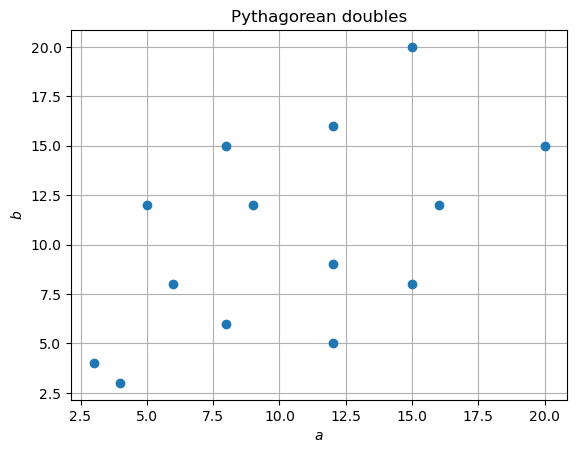

In [37]:
plt.plot(a_list, b_list, 'o')
plt.title('Pythagorean doubles')
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.grid()

**Exercise:** Write a function `get_ptriples` that takes in an integer `n` and returns a list of all Pythagorean triples $(a,b,c)$ where $1 \leq a, b \leq n$.

**Exercise:** Plot $a$ vs $b$ for the triples obtained from `get_ptriples` for various values of `n` and describe any patterns that emerge.

## Some thoughts for Project 1

In [38]:
false_primes = [561, 1105, 1729]
prime_factorizations = [[3, 11, 17], [5, 13, 17], [7, 13, 19]]

In [39]:
print(false_primes)

[561, 1105, 1729]


In [40]:
print(prime_factorizations)

[[3, 11, 17], [5, 13, 17], [7, 13, 19]]


In [41]:
for false_prime, prime_factorization in zip(false_primes, prime_factorizations):
    print('Prime factors of {}: {}'.format(false_prime, prime_factorization))

Prime factors of 561: [3, 11, 17]
Prime factors of 1105: [5, 13, 17]
Prime factors of 1729: [7, 13, 19]


In [42]:
print('Prime factorizations')
print('--------------------')
for false_prime, prime_factorization in zip(false_primes, prime_factorizations):
    prime_factorization_str = '*'.join([str(factor) for factor in prime_factorization])
    print('{} = {}'.format(false_prime, prime_factorization_str))

Prime factorizations
--------------------
561 = 3*11*17
1105 = 5*13*17
1729 = 7*13*19
